In [1]:
import numpy as np
import matplotlib.pyplot as plt

___

# Week 1

In [2]:
# Coppied data

import numpy as np;

Amat = np.array([
    [22.13831203, 0.16279204, 0.02353879, 0.02507880,-0.02243145,-0.02951967,-0.02401863],
    [0.16279204, 29.41831006, 0.02191543,-0.06341569, 0.02192010, 0.03284020, 0.03014052],
    [0.02353879,  0.02191543, 1.60947260,-0.01788177, 0.07075279, 0.03659182, 0.06105488],
    [0.02507880, -0.06341569,-0.01788177, 9.36187184,-0.07751218, 0.00541094,-0.10660903],
    [-0.02243145, 0.02192010, 0.07075279,-0.07751218, 0.71033323, 0.10958126, 0.12061597],
    [-0.02951967, 0.03284020, 0.03659182, 0.00541094, 0.10958126, 8.38326265, 0.06673979],
    [-0.02401863, 0.03014052, 0.06105488,-0.10660903, 0.12061597, 0.06673979, 1.15733569]]);

Bmat = np.array([
    [-0.03423002, 0.09822473,-0.00832308,-0.02524951,-0.00015116, 0.05321264, 0.01834117],
    [ 0.09822473,-0.51929354,-0.02050445, 0.10769768,-0.02394699,-0.04550922,-0.02907560],
    [-0.00832308,-0.02050445,-0.11285991, 0.04843759,-0.06732213,-0.08106876,-0.13042524],
    [-0.02524951, 0.10769768, 0.04843759,-0.10760461, 0.09008724, 0.05284246, 0.10728227],
    [-0.00015116,-0.02394699,-0.06732213, 0.09008724,-0.07596617,-0.02290627,-0.12421902],
    [ 0.05321264,-0.04550922,-0.08106876, 0.05284246,-0.02290627,-0.07399581,-0.07509467],
    [ 0.01834117,-0.02907560,-0.13042524, 0.10728227,-0.12421902,-0.07509467,-0.16777868]]);

yvec= np.array([-0.05677315,-0.00902581, 0.16002152, 0.07001784, 0.67801388,-0.10904168, 0.90505180]);
z = np.block([yvec, -yvec])

### *a (1)*

In [3]:
def max_norm(A):
    abs_mat = np.abs(A)
    row_sum = np.sum(abs_mat, axis=1)
    return np.max(row_sum)


def calc_condnumb_maxnorm(A):
    norm_A = max_norm(A)
    norm_A_inv = max_norm(np.linalg.inv(A))
    return norm_A * norm_A_inv


### *a (2)*

In [4]:
# Calculating condition numbers for all w

w = [0.800, 1.146, 1.400]

E = np.block([[Amat, Bmat], [Bmat, Amat]])
S = np.block([[np.eye(np.shape(Amat)[0]), np.zeros_like(Bmat)], [np.zeros_like(Bmat), -np.eye(np.shape(Amat)[0])]])
cond_numbs = [calc_condnumb_maxnorm(E - wi * S) for wi in w]

for i, cn in enumerate(cond_numbs):
    print(f"Condition number for w={w[i]}: {cn}")


Condition number for w=0.8: 327.8167042420992
Condition number for w=1.146: 152679.26875233834
Condition number for w=1.4: 227.19443667104446


The error on $z$ (or $y$) is given as:

$$
\frac{||\Delta z||}{||z||} = 10^{-8}
$$

As all other values are assumed exact we can calculate the relative error on $x$ using the formula on p. 61 in the book:

$$
\frac{||\Delta x||}{||x||} =  \text{cond}_\infty(\textbf{E} - \omega \textbf{S})\frac{||\Delta z||_\infty}{||z||_\infty}
$$


When the approximate value has a relative error on the form $10^{-p}$ then it's decimal representation has p correct digits (p. 6). So the amount og significant digits guaranteed on $x$ is then determined by taking the $-log_{10}$ of the relavtive error. Though this numbers is a decimal number, it must be rounded down to the nearest signifiant digit.



In [5]:
# Calculating the expected amount of significant digits

sig_dig = [-np.log10(cn * 10**-8) for cn in cond_numbs]

for i, sd in enumerate(sig_dig):
    print(rf'Significant digits for x with dy/y=10^{-8} = and w={w[i]}: {int(np.floor(sd))}')


Significant digits for x with dy/y=10^-8 = and w=0.8: 5
Significant digits for x with dy/y=10^-8 = and w=1.146: 2
Significant digits for x with dy/y=10^-8 = and w=1.4: 5


_____

### *b (1)*

In [6]:
dw = 0.5 * 10**(-3)
dws_maxnorm = max_norm(dw*S)

rfe = []

for wi in w:
    EwS = E - wi * S

    EwS_maxnorm = max_norm(EwS)
    EwS_condnumb = calc_condnumb_maxnorm(EwS)

    rfe_i = EwS_condnumb * dws_maxnorm / EwS_maxnorm
    print(f"Relative forward error for w={wi}: {rfe_i:.4f}")
    rfe.append(rfe_i)

Relative forward error for w=0.8: 0.0052
Relative forward error for w=1.146: 2.4050
Relative forward error for w=1.4: 0.0036


### b(2)

Again the amount of significant digits on $x$ is determined by taking the $-log_{10}$ of the relavtive error on $x$ determined in *b (1)*

In [7]:
# Significant digits for the rfe with w having 3 significant digits

for rfe_i in rfe:
    sig_dig_rfe = - np.log10(rfe_i)
    if sig_dig_rfe < 0:
        print(f"Guaranteed significant digits for rfe={rfe_i:.4f}: {0}")
    else:
        print(f"Guaranteed significant digits for rfe={rfe_i:.4f}: {int(np.floor(sig_dig_rfe))}")



Guaranteed significant digits for rfe=0.0052: 2
Guaranteed significant digits for rfe=2.4050: 0
Guaranteed significant digits for rfe=0.0036: 2



______
### *c (1)*

In [8]:
def lu_factorize(M):
    n = M.shape[0]
    U = M.copy()
    L = np.eye(n)

    for i in range(n):
        """
        Construct L and U matrices (lower and upper diagonalised matrices) using LU factorization.
        """

        if U[i,i] == 0:
            raise ValueError("Singular matrix (zero on diagonal in M)")
        for j in range(i + 1, n):
            # Compute the multiplier
            m_ik = U[j,i] / U[i,i]

            # Update the lower triangular matrix
            L[j, i] = m_ik

            # Implement Gaussian elimination to construct U (upper traingular)
            U[j, :] = U[j, :] - m_ik * U[i, :]

    return L, U


def forward_substitute(L, z):
    """
    Solve L y = z for y, where L is a lower triangular matrix.

    Parameters:
    -----------
    L: Lower triangular matrix (ndarray) of size NxN
            Reduced matrix on lower triangular form describing the linear equation system


    z: Vector (ndarray) of size N
        Used for finding solution y of the system Ly = z using forward substitution


    Returns:
    --------
    y: Vector (ndarray) of size N
        Solution of the equation system defined by L and z
            
    """

    y = z.copy()
    n = L.shape[0]
    
    for j in range(n):
        if L[j, j] == 0:
            raise ValueError("Singular matrix (zero on diagonal in L)")
        
        y[j] = y[j] / L[j, j]
        for i in range(j + 1, n):
            y[i] = y[i] - L[i,j] * y[j]
        
    return y


def backward_substitute(U, y, tol=1e-12):
    """
    Solve U x = y for x, where U is an upper triangular matrix.


    Parameters:
    -----------
    U: Upper triangular Matrix (ndarray) of size NxN 
            Reduced matrix on upper triangular form describing linear the equation system


    y: Vector (ndarray) of size N
            Used for finding solution x for the system Ux = y using backward substitution

    
    Returns:
    --------
    x: Vector (ndarray) of size N
            Solution of the equation system defined by U and y

    """
    x = y.copy()
    n = U.shape[0]

    for j in range(n - 1, -1, -1):
        if np.abs(U[j, j]) < tol:
            x[j] = 0
        else:
            x[j] = x[j] / U[j,j]
            for i in range(j):
                x[i] = x[i] - U[i,j] * x[j]

    return x


In [9]:
A = np.array([[2, 1, 1],
              [4, 1, 4],
              [-6, -5, 3]])

b = np.array([4, 11, 4])
L, U = lu_factorize(A)

A_recon = np.matmul(L, U)
if np.allclose(A, A_recon):
    print("LU factorization successful")
else:
    print("LU factorization failed")

y = forward_substitute(L, b)
y_test = np.linalg.solve(L, b)
print(y, y_test)

x = backward_substitute(U, y)
x_test = np.linalg.solve(A, b)
print(x, x_test)

LU factorization successful
[ 4  3 10] [ 4.  3. 10.]
[-4  7  5] [-4.  7.  5.]


______

### *d*

In [10]:
def solve_alpha(omega, E=E.copy(), S=S.copy(), z=z.copy()):
    # E = E.copy()
    # S = S.copy()
    # z = z.copy()

    M = E - omega * S
    L, U = lu_factorize(M)
    y = forward_substitute(L, z)
    x = backward_substitute(U, y)

    alpha = np.dot(z.T, x)

    return(alpha)


### *d (1)*

In [11]:

omegas = w + [w_i + dw for w_i, dw in zip(w, [dw]*len(w))]
omegas = omegas + [w_i - dw for w_i, dw in zip(w, [dw]*len(w))]

alphas = []
for w_i in omegas:
    alphas.append(solve_alpha(w_i))

# Make omegas and alphas into a dataframe for easier showing
import pandas as pd

df = pd.DataFrame({r'Frequency ω': omegas[:3], 
                   r'α(ω - ẟω)': alphas[6:9],
                   r'α(ω)': alphas[:3],
                   r'α(ω + ẟω)': alphas[3:6]
                   })

df.index = ['', '', '']
display(df)


,Frequency ω,α(ω - ẟω),α(ω),α(ω + ẟω)
,0.800,1.627816,1.636138,1.644431
,1.146,994.752992,2609.235324,-4185.018283
,1.400,-2.713880,-2.706893,-2.699927


### *d (2)*

The error determined in *b (2)* is related to a petubation in the matrix $\textbf{M} = \textbf{E} - \omega \textbf{S}$ by the error on $\omega$. In this exercise, there is again an introduced an error on $\omega$, so the error-bound from exercise *b (2)* would be the correct error-bound for understanding the influence of a pertubation in the system.

### *d (3)*

From the uppper error bound we have

$$
\frac{||\Delta x||_\infty}{||\hat{x}||_\infty} \leq \text{cond}_\infty (\textbf{E} - \omega \textbf{S}) \frac{||\delta \omega \textbf{S}||_\infty}{||\textbf{E} - \omega \textbf{S}||_{\infty}} 
$$

By multiplying each side with $\frac{||z^T||_\infty}{||z^T||_\infty}$ we get

$$
\frac{||z^T||_\infty}{||z^T||_\infty}\frac{||\Delta x||_\infty}{||\hat{x}||_\infty} = \frac{||z^T\Delta x||_\infty}{||z^T\hat{x}||_\infty} = \frac{||\Delta \alpha(\omega)||_\infty}{||\hat{\alpha}(\omega)||_\infty} \leq \text{cond}_\infty (\textbf{E} - \omega \textbf{S}) \frac{||\delta \omega \textbf{S}||_\infty}{||\textbf{E} - \omega \textbf{S}||_{\infty}} 
$$

Multiplying with $||\hat{\alpha}(\omega)||_\infty = |\hat{\alpha}(\omega)|$ (This is true as $\hat{\alpha}(\omega)$ is just a number) and using that $||\delta \omega \textbf{S}||_\infty = |\delta \omega| \cdot ||\textbf{S}||_\infty$ we obtain:


$$
||\Delta \alpha(\omega)||_\infty \leq \text{cond}_\infty (\textbf{E} - \omega \textbf{S}) \frac{||\textbf{S}||_\infty}{||\textbf{E} - \omega \textbf{S}||_{\infty}} |\hat{\alpha}(\omega) \delta \omega|
$$


In [12]:
def upper_bound(cond_numb, dw, w, S=S, E=E):
    return cond_numb * max_norm(S)/ max_norm(E - w * S) * abs(solve_alpha(w)) * abs(dw)


def delta_alpha(w, dw):
    return solve_alpha(w + dw) - solve_alpha(w)


for i, wi in enumerate(w):
    ub = upper_bound(cond_numbs[i], dw, wi)
    da = delta_alpha(wi, dw)
    if abs(da) < ub:
        print(f"Upper bound holds for w={wi}: |Δα| = {abs(da):.6f} ; {ub:.6f} (upper bound)")
    else:
        print(f"Upper bound does not hold for w={wi}: |Δα| = {abs(da):.6f} ; {ub:.6f} (upper bound)")

Upper bound holds for w=0.8: |Δα| = 0.008293 ; 0.008542 (upper bound)
Upper bound does not hold for w=1.146: |Δα| = 6794.253607 ; 6275.302975 (upper bound)
Upper bound holds for w=1.4: |Δα| = 0.006966 ; 0.009611 (upper bound)


As seen in the cell above, the values for $\Delta \alpha (\omega)$ hold for $\omega=0.8$ and $\omega=1.4$ within $+\delta \omega = 10^{-3}$ 

For $\omega = 1.146$ (close to the singularity) the value of $\Delta \alpha (\omega)$ goes beyond the upper bound, showing that the system breaks down close to the singularity

### *e (1)* 

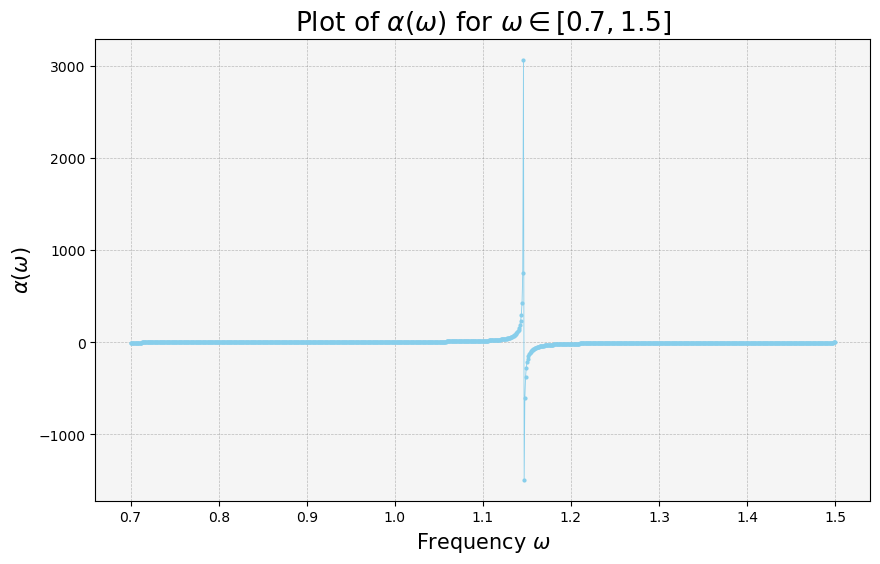

In [13]:
w_list = np.linspace(0.7, 1.5, 1000)
alphas_list = [solve_alpha(wi) for wi in w_list]

fig, ax = plt.subplots(figsize=(10, 6), dpi=100)
ax.plot(w_list, alphas_list, marker=".",  color='skyblue', ls="-", linewidth=0.6, markersize=4,)
ax.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
ax.set_xlabel(r'Frequency $\omega$', fontsize=15)
ax.set_ylabel(r'$\alpha(\omega)$', fontsize=15)
ax.set_title(r'Plot of $\alpha(\omega)$ for $\omega \in [0.7, 1.5]$', fontsize=19)
ax.set_facecolor('whitesmoke')


### *e (2)*

At the frequency $\omega = 1.14630799$ there is a discontinuity in the system. If one was to calculate the condition number of the matrix at this frequency, the number would be extremely large for the given frequency i.e. approaching infinity. When $\text{cond}_\infty(\textbf{M}) \rightarrow 0$ the matrix $\textbf{M}$ is singular, and there are thefore no or infinitely many solutions for $x$ of the given system.

_____


# Week 2


### *f(1), f(2) & f(3)*

In [14]:
# Basic Householder QR algorithm (slow version)

def householder_QR_slow(A):
    A = A.astype(float).copy()
    m, n = (A.shape)
    Q = np.eye(m)

    for k in range(min(m, n)):

        u_k = A[k:, k]

        alpha = - np.sign(A[k, k]) * np.linalg.norm(A[k:, k])
        e_k = np.zeros_like(u_k)
        e_k[0] = 1.0
    
        v_k = u_k - alpha * e_k
        b_k = v_k.T @ v_k
        if b_k == 0:
            continue

        for j in range(k, n):
            y_j = v_k @ A[k:, j]
            A[k:, j] -= 2 * v_k * y_j / b_k

        H = np.eye(m)
        v_k_col = v_k.reshape(-1, 1)
        H[k:, k:] -= 2 * v_k_col @ v_k_col.T / b_k

        Q = Q @ H
          
    R = A.copy()
    return Q, R




In [15]:
# Importing test matrices

A0 = np.array([[1,2],[3,4]])
A1 = np.array([[1,2],[3,4],[5,6]])
A2 = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

b0 = np.array([1,2])
b1 = np.array([1,2,3])
b2 = np.array([1,2,3,4])

x0 = np.array([-0. ,  0.5])
x1 = np.array([-0. ,  0.5])
x2 = np.array([-0.33333333,  0.66666667,  0.        ])

In [16]:
# Testing the slow Householder QR algorithm 

Chosen_A = A2  # Works for all A0, A1, A2
Q, R_slow = householder_QR_slow(Chosen_A)
print(R_slow)
print()
print("Q @ Q.T =\n", Q @ Q.T, "\n Similar to the Identity?", np.allclose(Q @ Q.T, np.eye(Q.shape[0])))
print()
print("Q @ R_slow =\n", Q @ R_slow, "\n Similar to Chosen_A?", np.allclose(Q @ R_slow, Chosen_A))




[[-1.28840987e+01 -1.45916299e+01 -1.62991610e+01]
 [ 0.00000000e+00 -1.04131520e+00 -2.08263040e+00]
 [ 0.00000000e+00  5.55111512e-17  1.13220977e-15]
 [ 0.00000000e+00  1.11022302e-16  0.00000000e+00]]

Q @ Q.T =
 [[ 1.00000000e+00 -9.90941971e-18 -1.88033543e-16 -1.47431281e-16]
 [-9.90941971e-18  1.00000000e+00 -5.53952425e-18 -3.22897301e-17]
 [-1.88033543e-16 -5.53952425e-18  1.00000000e+00  7.59416653e-17]
 [-1.47431281e-16 -3.22897301e-17  7.59416653e-17  1.00000000e+00]] 
 Similar to the Identity? True

Q @ R_slow =
 [[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]] 
 Similar to Chosen_A? True


In [17]:
#  Faster Householder QR algorithm
def householder_fast(A):
    A = A.astype(float).copy()
    m, n = A.shape
    VR = np.zeros((m + 1, n))


    for k in range(min(m, n)):
        
        # Constructing Householder vector 
        u_k = A[k:, k]
        alpha = -np.copysign(np.linalg.norm(u_k), A[k,k])
        e_k = np.zeros_like(u_k)
        e_k[0] = 1.0
        v_k = u_k - alpha * e_k

        b_k = v_k.T @ v_k
        if b_k == 0:
            VR[k, k:] = A[k, k:]
            continue
        
        
        # Updating all rows with the householder vector 
        for j in range(k, n):
            y_j = v_k @ A[k:, j]
            A[k:, j] -= 2 * v_k * y_j / b_k

        VR[k, k:] = A[k, k:]
        VR[k+1: k+1 + len(v_k), k] = v_k

    return VR

In [18]:
VR = householder_fast(Chosen_A)

# Extracting R from VR
R_fast = np.triu(VR[:Chosen_A.shape[0], :])

if np.allclose(R_fast, R_slow):
    print("Fast Householder QR successful")
else:
    print("Fast Householder QR failed")    

print(VR)

Fast Householder QR successful
[[-1.28840987e+01 -1.45916299e+01 -1.62991610e+01]
 [ 1.38840987e+01 -1.04131520e+00 -2.08263040e+00]
 [ 4.00000000e+00  1.26127720e+00  1.13220977e-15]
 [ 7.00000000e+00 -3.65066503e-01 -2.24243280e-15]
 [ 1.00000000e+01 -9.50095004e-01  2.22044605e-16]]


In [19]:
def H_b(b, VR):
    m_p1, n = VR.shape
    m = m_p1 - 1
    y = b.astype(float).copy()

    for k in range(min(m_p1, n)):
        # Extract full Householder vector from VR
        v_k = VR[k+1:k+1+(m-k), k]
        if np.allclose(v_k, 0):
            continue
        
        b_k = v_k.T @ v_k
        tau = v_k @ y[k:]
        y[k:] -= 2 * tau / b_k * v_k

    # Extracting R part from VR
    R = np.zeros((n, n))
    for i in range(n):
        R[i, i:] = VR[i, i:]
    return y, R


def least_squares(A, b):
    VR = householder_fast(A)
    y, R = H_b(b, VR)
    y1 = y[:A.shape[1]]
    x = backward_substitute(R, y1)

    r = b - A @ x
    r_norm = np.linalg.norm(r)
    return x, r_norm, R

chosen_a = A1
chosen_b = b1

x_ls, r_ls, R_ls = least_squares(chosen_a, chosen_b)
print("R from least squares:\n", np.round(R_ls, 3))
print("Least squares solution x:\n", np.round(x_ls, 3))


R from least squares:
 [[-5.916 -7.437]
 [ 0.     0.828]]
Least squares solution x:
 [0.  0.5]


### *g(1), g(2) & g(3)*

Because of the singularity in the system i chose a value of $\omega$ just below singularity:

$$
\omega_p = 1.1
$$ 

For estimating the coefficients i set up two systems of equations with the format:

$$
\begin{bmatrix}
    1 & \omega_0^2 & \omega_0^4 & \omega_0^6 \\
    : & ... & ... & : \\
    : & ... & ... & : \\ 
    1 & \omega_k^2 & \omega_k^4 & \omega_k^6 \\ 
\end{bmatrix}

\begin{bmatrix}
    a_0 \\
    a_1 \\
    a_2 \\
    a_3 \\
\end{bmatrix}

= 

\begin{bmatrix}
    \alpha(\omega_0) \\
    : \\
    : \\
    \alpha(\omega_k) \\
\end{bmatrix}

$$

and 

$$
\begin{bmatrix}
    1 & \omega_0^2 & \omega_0^4 & \omega_0^6 & \omega_0^8 & \omega_0^10 \\
    : & ... & ... & ... & ... &: \\
    : & ... & ... & ... & ... &: \\ 
    1 & \omega_k^2 & \omega_k^4 & \omega_k^6 & \omega_k^8 & \omega_0^10 \\ 
\end{bmatrix}

\begin{bmatrix}
    a_0 \\
    a_1 \\
    a_2 \\
    a_3 \\
    a_4 \\
    a_5 \\
\end{bmatrix}

= 

\begin{bmatrix}
    \alpha(\omega_0) \\
    : \\
    : \\
    \alpha(\omega_k) \\
\end{bmatrix}

$$

Where each $\omega_l$ up to $k$ is an omega in the space $\omega \in [0.7, 1.1]$. This was solved using the different algorithms from earlier exercises. And the results are shown i the plots below.

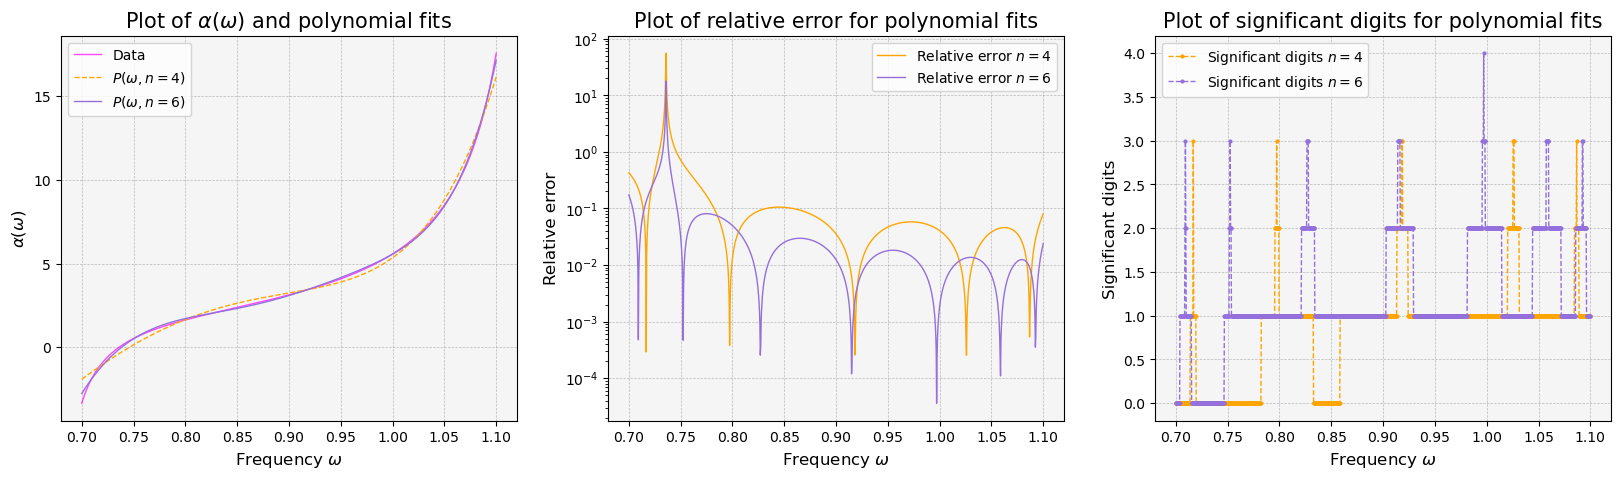

In [20]:
w_p = 1.1
omegas = np.linspace(0.7, w_p, 1000)
alpha_list = np.array([solve_alpha(wi) for wi in omegas])

def poly_omega(w, x_j):
    parts = []
    for i in range(len(x_j)):
        part = x_j[i] * w**(2 * i)
        parts.append(part)

    result = np.sum(parts, axis=0)
    return result


n4,n6 = 4,6 # degrees of polynomial
X4 = np.column_stack([omegas**(2*j) for j in range(n4+1)])
X6 = np.column_stack([omegas**(2*j) for j in range(n6+1)])

x4, r4, R4 = least_squares(X4, alpha_list)
x6, r6, R6 = least_squares(X6, alpha_list)

y4 = poly_omega(omegas, x4)
y6 = poly_omega(omegas, x6)

y4_rel_err = np.abs((y4 - alpha_list) / alpha_list)
y6_rel_err = np.abs((y6 - alpha_list) / alpha_list)

y4_sig_dig = np.floor(-np.log10(y4_rel_err))
y4_sig_dig[y4_sig_dig < 0] = 0

y6_sig_dig = np.floor(-np.log10(y6_rel_err))
y6_sig_dig[y6_sig_dig < 0] = 0
 

fig, ax = plt.subplots(1, 3, figsize=(20, 5), dpi=100)

ax[0].plot(omegas, alpha_list, marker='', ls='-', label='Data', color='fuchsia', markersize=2, alpha=0.7, linewidth=1)
ax[0].plot(omegas, y4, label=r'$P(\omega, n=4)$', ls='--', color='orange', alpha=1, linewidth=1)
ax[0].plot(omegas, y6, label=r'$P(\omega, n=6)$', color ='mediumpurple', alpha=1, linewidth=1)
ax[0].set_title(r'Plot of $\alpha(\omega)$ and polynomial fits', fontsize=15)
ax[0].set_xlabel(r'Frequency $\omega$', fontsize=12)
ax[0].set_ylabel(r'$\alpha(\omega)$', fontsize=12)

ax[1].plot(omegas, y4_rel_err, label=r'Relative error $n=4$', color='orange', alpha=1, linewidth=1)
ax[1].set_yscale('log')
ax[1].plot(omegas, y6_rel_err, label=r'Relative error $n=6$', color='mediumpurple', alpha=1, linewidth=1)
ax[1].set_title(r'Plot of relative error for polynomial fits', fontsize=15)
ax[1].set_xlabel(r'Frequency $\omega$', fontsize=12)
ax[1].set_ylabel(r'Relative error', fontsize=12)

ax[2].plot(omegas, y4_sig_dig, label=r'Significant digits $n=4$', color='orange', alpha=1, ls='--', marker='o', markersize=2, linewidth=1)
ax[2].plot(omegas, y6_sig_dig, label=r'Significant digits $n=6$', color='mediumpurple', alpha=1, ls='--', marker='o', markersize=2, linewidth=1)
ax[2].set_title(r'Plot of significant digits for polynomial fits', fontsize=15)
ax[2].set_xlabel(r'Frequency $\omega$', fontsize=12)
ax[2].set_ylabel(r'Significant digits', fontsize=12)


for axi in ax:
    axi.legend()
    axi.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
    axi.set_facecolor('whitesmoke')


### *h(1)*

The polynomial from *g* is not able to express any singularities, but with the new rational approximation function there is a possibility of a singularity when

$$
\sum_{j=1}^n b_j w^j = -1
$$

### *h(2)*

With some tinkering around, equation *(5)* can be expressed as

$$ 
Q(\omega) = \sum_{j=0}^n a_j\omega^j - Q(\omega)\sum_{j=1}^n b_j\omega^j 
$$

Where 

$$
Q =  
\begin{bmatrix}   
\alpha(\omega_0) \\
: \\
: \\
\alpha(\omega_k) \\
\end{bmatrix}
$$ 

For $n = 2$ system of equations looks like


$$
\begin{bmatrix}
    1 & \omega_0 & \omega_0^2 & \alpha(\omega_0)\omega_0 & \alpha(\omega_0)\omega_2 \\
    : & ... & ... & ... &  : \\
    : & ... & ... & ... &  : \\ 
    1 & \omega_k & \omega_k^2 & \alpha(\omega_k)\omega_k & \alpha(\omega_k)\omega_2 \\
\end{bmatrix}

\begin{bmatrix}
    a_0 \\
    a_1 \\
    a_2 \\
    b_1 \\
    b_2 \\
\end{bmatrix}

= 

\begin{bmatrix}
    \alpha(\omega_0) \\
    : \\
    : \\
    \alpha(\omega_k) \\
\end{bmatrix}

$$

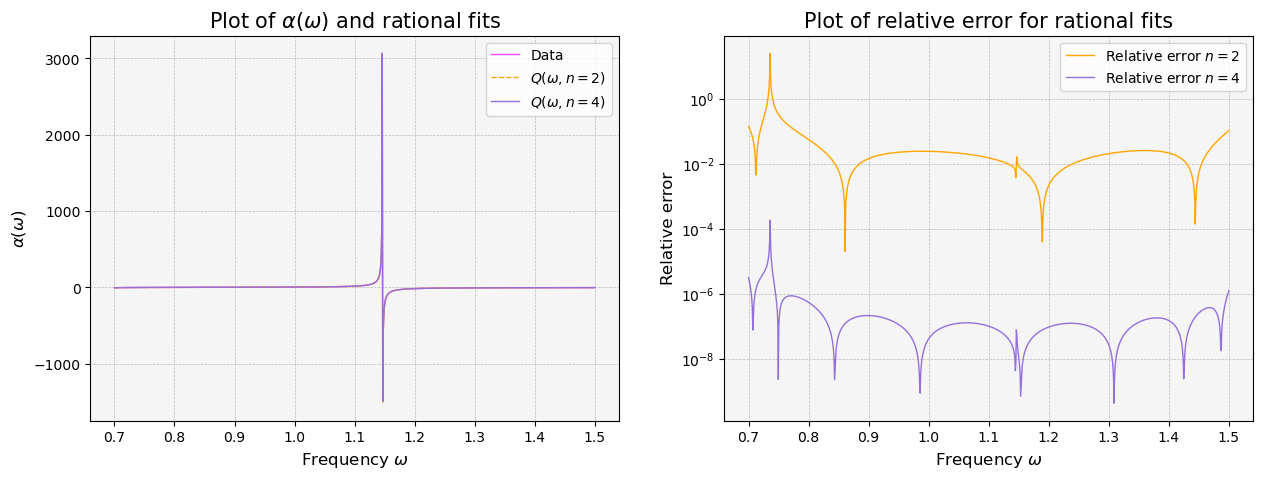

In [21]:
omegas_whole = np.linspace(0.7, 1.5, 1000)
alphas_whole = np.array([solve_alpha(wi) for wi in omegas_whole])

n2 = 2
n4 = 4

M2 = np.column_stack([omegas_whole**j for j in range(n2 +1)])
M2_pad = np.column_stack([-alphas_whole * omegas_whole**j for j in range(1, n2 +1)])
M2_full = np.hstack([M2, M2_pad])

M4 = np.column_stack([omegas_whole**j for j in range(n4 +1)])
M4_pad = np.column_stack([-alphas_whole * omegas_whole**j for j in range(1, n4 +1)])
M4_full = np.hstack([M4, M4_pad])

x2, r2, R2 = least_squares(M2_full, alphas_whole)
x4, r4, R4 = least_squares(M4_full, alphas_whole)

def q_w(w, x, n):
    q_sum = np.array([sum(omegas**j * x[j] for j in range(n+1)) / 
                      (1 + sum(omegas**k * x[k + n] for k in range(1, n+1))) 
                      for omegas in w])
    return q_sum



y2 = q_w(omegas_whole, x2, n2)
y4 = q_w(omegas_whole, x4, n4)

y2_rel_err = np.abs((y2 - alphas_whole) / alphas_whole)
y4_rel_err = np.abs((y4 - alphas_whole) / alphas_whole)

fig, ax = plt.subplots(1, 2, figsize=(15, 5), dpi=100)
ax[0].plot(omegas_whole, alphas_whole, marker='', ls='-', label='Data', color='fuchsia', markersize=2, alpha=0.7, linewidth=1)
ax[0].plot(omegas_whole, y2, label=r'$Q(\omega, n=2)$', ls='--', color='orange', alpha=1, linewidth=1)
ax[0].plot(omegas_whole, y4, label=r'$Q(\omega, n=4)$', color ='mediumpurple', alpha=1, linewidth=1)
ax[0].set_title(r'Plot of $\alpha(\omega)$ and rational fits', fontsize=15)
ax[0].set_xlabel(r'Frequency $\omega$', fontsize=12)
ax[0].set_ylabel(r'$\alpha(\omega)$', fontsize=12)

ax[1].plot(omegas_whole, y2_rel_err, label=r'Relative error $n=2$', color='orange', alpha=1, linewidth=1)
ax[1].set_yscale('log')
ax[1].plot(omegas_whole, y4_rel_err, label=r'Relative error $n=4$', color='mediumpurple', alpha=1, linewidth=1)
ax[1].set_title(r'Plot of relative error for rational fits', fontsize=15)
ax[1].set_xlabel(r'Frequency $\omega$', fontsize=12)
ax[1].set_ylabel(r'Relative error', fontsize=12)

for axi in ax:
    axi.legend()
    axi.grid(color='grey', linestyle='--', linewidth=0.5, alpha=0.5)
    axi.set_facecolor('whitesmoke')

The relative errors for $n=2$ seems like it is a factor a million larger at most values og $\omega$, so it is clear that the fit for higher $n$ is way more presize in the estimate of $\alpha$